In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("titanic-passengers.csv")
column = list(data.columns)
column = column[0].split(";")
df = pd.DataFrame()
for index,row in data.iterrows():
    ind = index.split(";")
    rpw = row.tolist()[0].split(";")
    liste = ind + rpw
    liste[3] = liste[len(ind)] , " " , liste[len(ind)-1]
    del liste[4]
    dico = {}
    for i in range (0,len(column)):
        if(liste[i] == " " or liste[i] == ""):
            liste[i] = np.nan 
        try:
            dico[column[i]] = int(liste[i])
        except:
            try:
                dico[column[i]] = float(liste[i])
            except:
                dico[column[i]] = liste[i]
    df = df.append(dico,ignore_index = True)

for j in ["Age","Embarked"]:
    df[j].fillna(df[j].mode()[0],inplace = True)
del column[10]
df.dropna(axis = 1, inplace = True)


for i in column:
    print(i, ":" ,df[i].isnull().sum())

df

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Embarked : 0


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,28.0,S,13.0000,"( Mr. Erik Gustaf, , Collander)",0.0,343.0,2.0,male,0.0,No,248740
1,25.0,S,7.6500,"( Mr. Sigurd Hansen, , Moen)",0.0,76.0,3.0,male,0.0,No,348123
2,20.0,S,7.8542,"( Mr. Hans Peder, , Jensen)",0.0,641.0,3.0,male,0.0,No,350050
3,29.0,S,21.0750,"( Mrs. Nils (Alma Cornelia Berglund), , Palsson)",4.0,568.0,3.0,female,0.0,No,349909
4,31.0,S,52.0000,"( Mr. Thornton, , Davidson)",0.0,672.0,1.0,male,1.0,No,F.C. 12750
...,...,...,...,...,...,...,...,...,...,...,...
886,14.0,C,30.0708,"( Mrs. Nicholas (Adele Achem), , Nasser)",0.0,10.0,2.0,female,1.0,Yes,237736
887,22.0,C,7.2292,"( Mr. Orsen, , Sirayanian)",0.0,61.0,3.0,male,0.0,No,2669
888,30.0,S,8.6625,"( Miss. Marija, , Cacic)",0.0,535.0,3.0,female,0.0,No,315084
889,24.0,S,7.8958,"( Mr. Pastcho (""""Pentcho"""")"", , ""Petroff)",0.0,102.0,3.0,male,0.0,No,349215


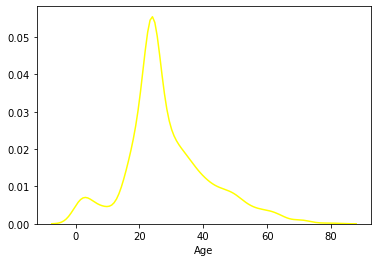

In [23]:
sns.distplot(df["Age"], hist = False, kde = True, bins = 10,color="yellow")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

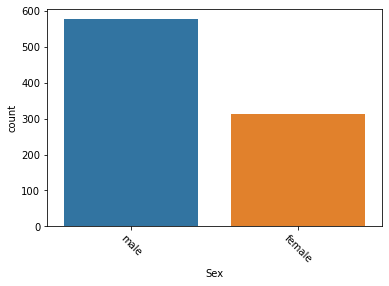

In [34]:
sns.countplot(df["Sex"])
plt.xticks(rotation=-45)


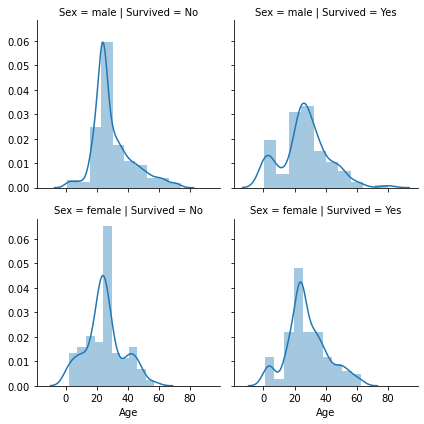

In [35]:
g = sns.FacetGrid(data = df,row="Sex", col = "Survived")
g.map(sns.distplot, "Age",bins=10)

 Less and Less people are in pclasses when we increment the value of the pclass
          - The number of people who survived in the first Pclass is more than the number of people who didn't survive
          - Most of the passengers paid a fare between 100 and 0.
          - We can see in the first pclass that certain passengers paid a fare of more than 200 dollars and some of them survived and other didn't survive hence we can say that the Fare paid don't significantly impact the chances of surviving


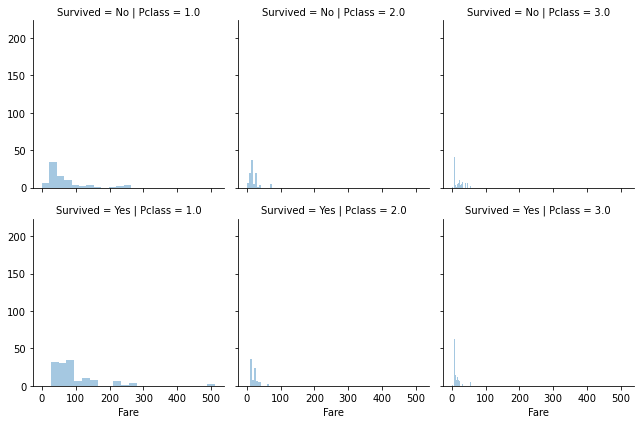

In [37]:
gr = sns.FacetGrid(data = df, col = "Pclass", row = "Survived")
gr.map(sns.distplot,"Fare",hist=True,kde=False)
print(""" Less and Less people are in pclasses when we increment the value of the pclass
          - The number of people who survived in the first Pclass is more than the number of people who didn't survive
          - Most of the passengers paid a fare between 100 and 0.
          - We can see in the first pclass that certain passengers paid a fare of more than 200 dollars and some of them survived and other didn't survive hence we can say that the Fare paid don't significantly impact the chances of surviving""")

this funtion give to us a heat map when we can see the corerelation beetween 2 numerical variable.The variable of this heatmap is between the minimum and 1.
when the variable is 1 this means that it is the same column. if the variable is negative that means there is a negative correlation between the 2 columns but if the varible
is posituve that means that the correlation is positive.
      The correlation value is obtained via the following formula :
        correlation(x,y) = cov(x,y)/x_std*y_std
        where cov(x,y) is the covariance between x and y
        and x_std and y_std are the standard deviations of x and y respectively
    


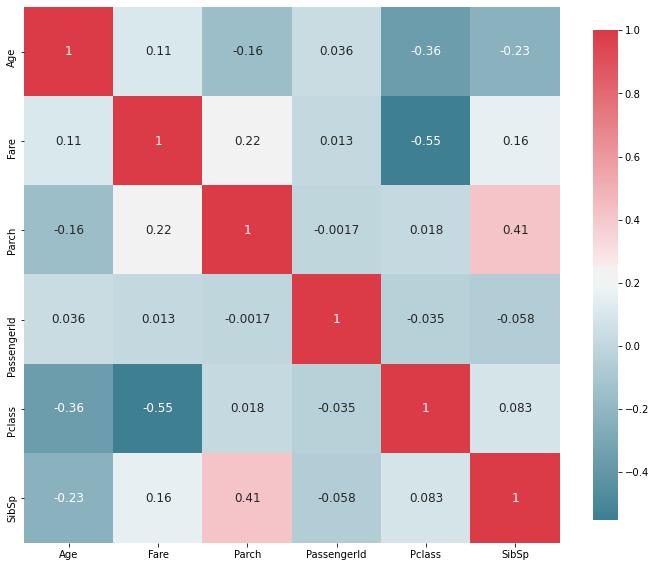

In [39]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)
print("""this funtion give to us a heat map when we can see the corerelation beetween 2 numerical variable.The variable of this heatmap is between the minimum and 1.
when the variable is 1 this means that it is the same column. if the variable is negative that means there is a negative correlation between the 2 columns but if the varible
is posituve that means that the correlation is positive.
      The correlation value is obtained via the following formula :
        correlation(x,y) = cov(x,y)/x_std*y_std
        where cov(x,y) is the covariance between x and y
        and x_std and y_std are the standard deviations of x and y respectively
    """)

In [40]:
df[["Pclass","Survived"]].groupby("Survived",as_index = True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [48]:
d = pd.DataFrame()
for i in df["Name"]:
    val = i[0].split(".")[0][1:]
    s = pd.Series(val)
    d = d.append(s,ignore_index = True)

d = d.rename(columns = {0 : "Title"})
df = df.drop(columns = "Name",axis = 1)
df = df.join(d)
df


,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,28.0,S,13.0000,0.0,343.0,2.0,male,0.0,No,248740,Mr
1,25.0,S,7.6500,0.0,76.0,3.0,male,0.0,No,348123,Mr
2,20.0,S,7.8542,0.0,641.0,3.0,male,0.0,No,350050,Mr
3,29.0,S,21.0750,4.0,568.0,3.0,female,0.0,No,349909,Mrs
4,31.0,S,52.0000,0.0,672.0,1.0,male,1.0,No,F.C. 12750,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,14.0,C,30.0708,0.0,10.0,2.0,female,1.0,Yes,237736,Mrs
887,22.0,C,7.2292,0.0,61.0,3.0,male,0.0,No,2669,Mr
888,30.0,S,8.6625,0.0,535.0,3.0,female,0.0,No,315084,Miss
889,24.0,S,7.8958,0.0,102.0,3.0,male,0.0,No,349215,Mr


Correlation HeatMap :


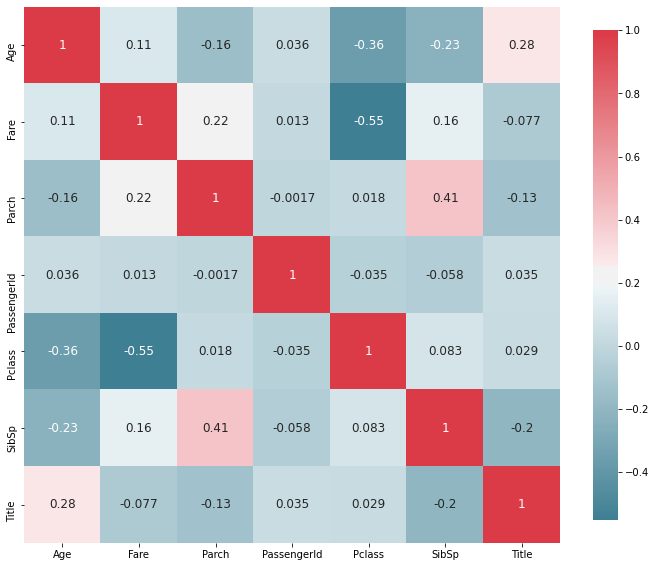

In [49]:
def encoding():
    encod = LabelEncoder()
    df["Title"] =  encod.fit_transform(df["Title"])
    plot_correlation_map(df)
    df["Title"] = encod.inverse_transform(df["Title"])
    print("Correlation HeatMap :")
encoding()

In [50]:
Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Lady" :      "Royalty",
    "the Countess": "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Miss",
    "Mlle":       "Miss",
    "Miss" :      "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mrs",
    "Mrs" :       "Mrs",
    "Master" :    "Master"
}
ed = pd.DataFrame()
for id in df["Title"]:
    vald = Title_Dictionary[id]
    sd = pd.Series(vald)
    ed = ed.append(sd,ignore_index = True)

ed = ed.rename(columns = {0 : "Title"})
df = df.drop(columns = "Title",axis = 1)
df = df.join(ed)
df


,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,28.0,S,13.0000,0.0,343.0,2.0,male,0.0,No,248740,Mrs
1,25.0,S,7.6500,0.0,76.0,3.0,male,0.0,No,348123,Mrs
2,20.0,S,7.8542,0.0,641.0,3.0,male,0.0,No,350050,Mrs
3,29.0,S,21.0750,4.0,568.0,3.0,female,0.0,No,349909,Mrs
4,31.0,S,52.0000,0.0,672.0,1.0,male,1.0,No,F.C. 12750,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,14.0,C,30.0708,0.0,10.0,2.0,female,1.0,Yes,237736,Mrs
887,22.0,C,7.2292,0.0,61.0,3.0,male,0.0,No,2669,Mrs
888,30.0,S,8.6625,0.0,535.0,3.0,female,0.0,No,315084,Miss
889,24.0,S,7.8958,0.0,102.0,3.0,male,0.0,No,349215,Mrs


Correlation HeatMap :
--------------------------------- Correlations between Title and others variables ------------------------------


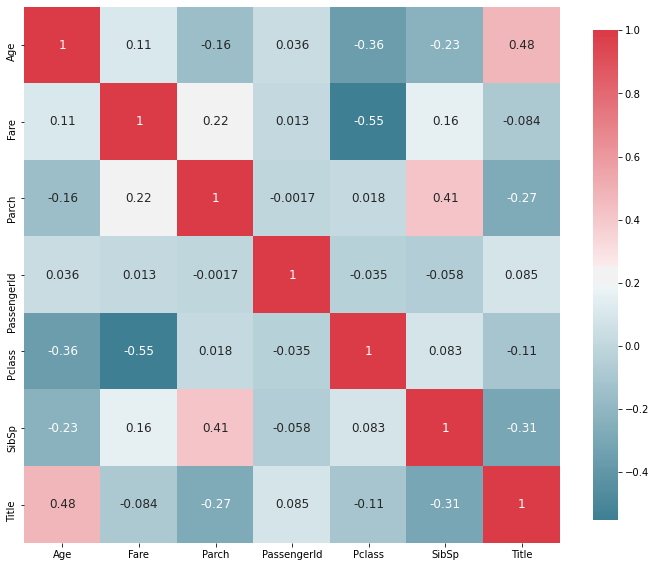

In [51]:
encoding()
encoder = LabelEncoder()
df["Title"] = encoder.fit_transform(df["Title"])
print("--------------------------------- Correlations between Title and others variables ------------------------------")

--------------------------------- Correlations between FamilySize and others variables ------------------------------


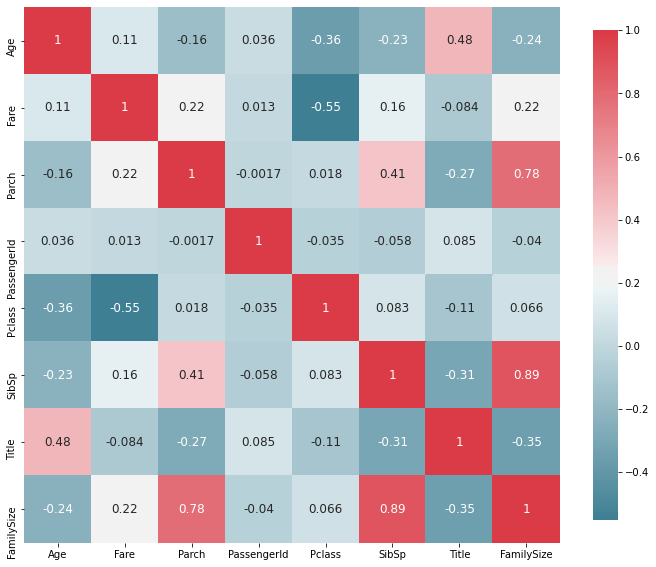

In [52]:
df["FamilySize"] = df["Parch"] + df["SibSp"]
plot_correlation_map(df)
print("--------------------------------- Correlations between FamilySize and others variables ------------------------------")


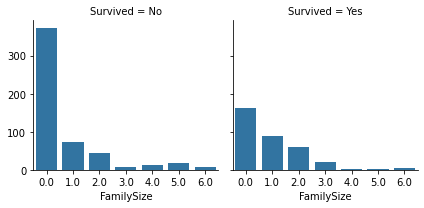

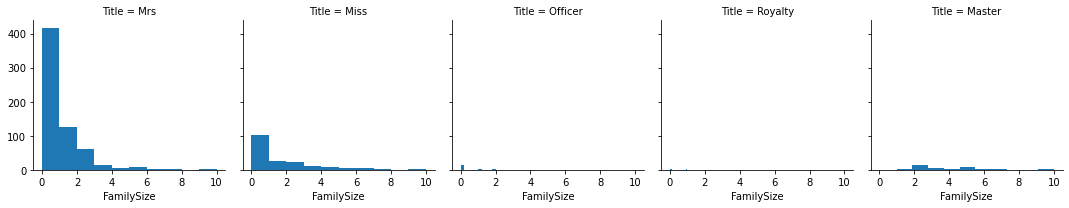

In [53]:
gri = sns.FacetGrid(data = df,col= "Survived")
gri.map(sns.countplot,"FamilySize",order = None)

df["Title"] = encoder.inverse_transform(df["Title"])

grid = sns.FacetGrid(data = df,col= "Title")
grid.map(plt.hist,"FamilySize")

In [54]:
df[["FamilySize","Age","Fare"]].groupby("FamilySize",as_index = True).mean().round()


,Age,Fare
FamilySize,,
0.0,30.0,21.0
1.0,30.0,50.0
2.0,26.0,40.0
3.0,19.0,55.0
4.0,22.0,58.0
5.0,18.0,74.0
6.0,15.0,29.0
7.0,16.0,47.0
10.0,24.0,70.0


In [55]:
print("""the variable family size does'nt have an impact on the survival of persons but we can see that the most people did not surive are alone.
the family size has no impact on the fare as we can see on the table nor on the age
We can see also on the heatmap the family size is not correlated with an another variable""")

the variable family size does'nt have an impact on the survival of persons but we can see that the most people did not surive are alone.
the family size has no impact on the fare as we can see on the table nor on the age
We can see also on the heatmap the family size is not correlated with an another variable
